<a href="https://colab.research.google.com/github/ZykinaViktoriya/library_python/blob/main/Pingouin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=c1a4e113adac6ceadda6328558c53011a01150d72711f9bf580329a81d08a696
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


# 1.T-test

In [5]:
import numpy as np
import pingouin as pg

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.400706,58,two-sided,0.001222,"[-1.68, -0.43]",0.878059,26.155,0.916807


# 2. Корреляция Пирсона

In [7]:
pg.corr(x, y)

,n,r,CI95%,p-val,BF10,power
pearson,30,0.594785,"[0.3, 0.79]",0.000527,69.723,0.950373


# 3. Устойчивая корреляция

In [8]:
# Introduce an outlier
x[5] = 18
# Use the robust biweight midcorrelation
pg.corr(x, y, method="bicor")

,n,r,CI95%,p-val,power
bicor,30,0.575834,"[0.27, 0.78]",0.000869,0.932799


# 4. Проверка на  нормальность данных
Функция pingouin.normality()работает со списками, массивами или пандами DataFrame в широком или длинном формате.

In [9]:
print(pg.normality(x))                                    # Univariate normality
print(pg.multivariate_normality(np.column_stack((x, y)))) # Multivariate normality

          W          pval  normal
0  0.615321  1.128494e-07   False
HZResults(hz=1.6967733646126668, pval=0.00018201726664169367, normal=False)


# 5. График QQ

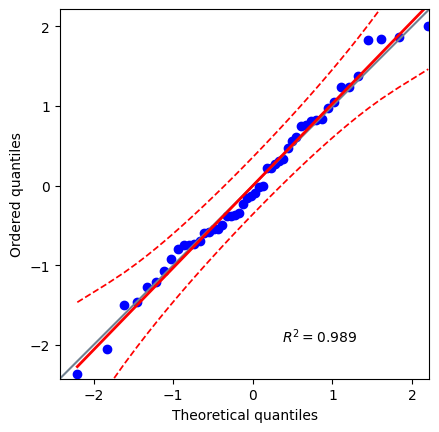

In [10]:
import numpy as np
import pingouin as pg
np.random.seed(123)
x = np.random.normal(size=50)
ax = pg.qqplot(x, dist='norm')

# 6. Односторонний дисперсионный анализ с использованием DataFrame pandas

In [11]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')

# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
print(aov)

   Source          SS   DF        MS         F   p-unc       np2
0   Group    5.459963    1  5.459963  5.243656  0.0232  0.028616
1  Within  185.342729  178  1.041251       NaN     NaN       NaN


# 7. Повторные измерения ANOVA

In [12]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.039981,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN


# 8. Апостериорные тесты с поправкой на множественные сравнения

In [13]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_tests(data=df, dv='Scores', within='Time', subject='Subject',
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast    A        B        Paired    Parametric         T     dof  alternative      p-unc    p-corr  p-adjust      BF10    hedges
----------  -------  -------  --------  ------------  ------  ------  -------------  -------  --------  ----------  ------  --------
Time        August   January  True      True          -1.740  59.000  two-sided        0.087     0.131  fdr_bh       0.582    -0.328
Time        August   June     True      True          -2.743  59.000  two-sided        0.008     0.024  fdr_bh       4.232    -0.483
Time        January  June     True      True          -1.024  59.000  two-sided        0.310     0.310  fdr_bh       0.232    -0.170



# 9. Двусторонний смешанный дисперсионный анализ

In [14]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                     subject='Subject', correction=False, effsize="np2")
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        5.460      1     58  5.460  5.052    0.028  0.080  nan
Time         7.628      2    116  3.814  4.027    0.020  0.065    0.999
Interaction  5.167      2    116  2.584  2.728    0.070  0.045  nan



# 10. Парные корреляции между столбцами датафрейма

In [24]:
import pandas as pd
np.random.seed(123)
z = np.random.normal(5, 1, 30)
data = pd.DataFrame({'X': x, 'Y': y, 'Z': z})
pg.pairwise_corr(data, columns=['X', 'Y', 'Z'], method='pearson')

ValueError: ignored

# 11. Попарный Т-тест между столбцами кадра данных

In [18]:
data.ptests(paired=True, stars=False)

NameError: ignored

# 12. Множественная линейная регрессия

In [25]:
pg.linear_regression(data[['X', 'Z']], data['Y'])

NameError: ignored

# 14. Анализ непредвиденных обстоятельств

In [27]:
data = pg.read_dataset('chi2_independence')
expected, observed, stats = pg.chi2_independence(data, x='sex', y='target')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.717227,1.0,1.876778e-06,0.273814,0.997494
1,cressie-read,0.666667,22.931427,1.0,1.678845e-06,0.275102,0.997663
2,log-likelihood,0.000000,23.557374,1.0,1.212439e-06,0.278832,0.998096
3,freeman-tukey,-0.500000,24.219622,1.0,8.595211e-07,0.282724,0.998469
4,mod-log-likelihood,-1.000000,25.071078,1.0,5.525544e-07,0.287651,0.998845
5,neyman,-2.000000,27.457956,1.0,1.605471e-07,0.301032,0.999481


# 15. График Бланда-Альтмана

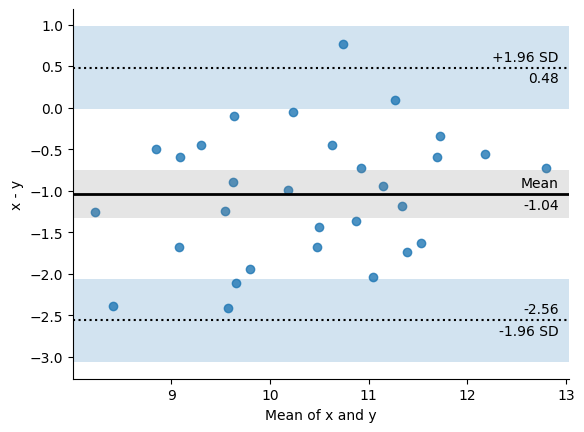

In [28]:
import numpy as np
import pingouin as pg
np.random.seed(123)
mean, cov = [10, 11], [[1, 0.8], [0.8, 1]]
x, y = np.random.multivariate_normal(mean, cov, 30).T
ax = pg.plot_blandaltman(x, y)

# 16. График достижения мощности парного Т-теста

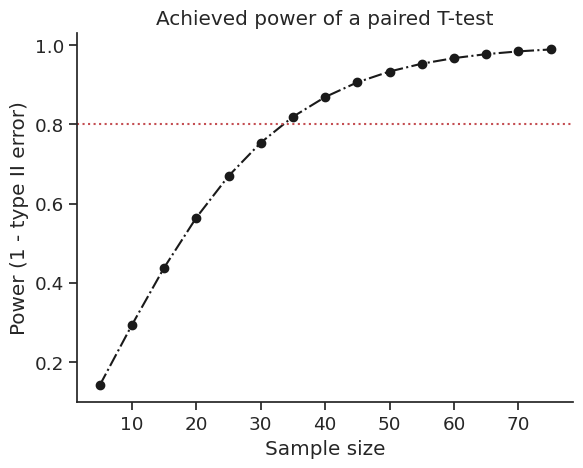

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np
sns.set(style='ticks', context='notebook', font_scale=1.2)
d = 0.5  # Fixed effect size
n = np.arange(5, 80, 5)  # Incrementing sample size
# Compute the achieved power
pwr = pg.power_ttest(d=d, n=n, contrast='paired')
# Start the plot
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='r', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()

# 17. Парное сравнение

Text(0.5, 1.0, 'Effect of meditation on school performance')

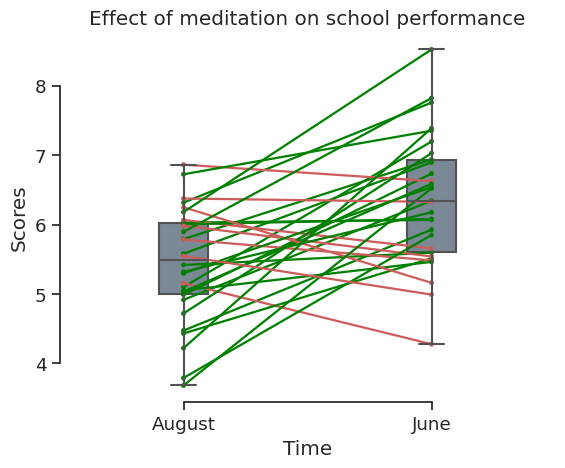

In [30]:
import pingouin as pg
import numpy as np
df = pg.read_dataset('mixed_anova').query("Group == 'Meditation' and Time != 'January'")
ax = pg.plot_paired(data=df, dv='Scores', within='Time', subject='Subject')
ax.set_title("Effect of meditation on school performance")

# Интеграция с Пандами

In [31]:
import pingouin as pg

# Example 1 | ANOVA
df = pg.read_dataset('mixed_anova')
df.anova(dv='Scores', between='Group', detailed=True)

# Example 2 | Pairwise correlations
data = pg.read_dataset('mediation')
data.pairwise_corr(columns=['X', 'M', 'Y'], covar=['Mbin'])

# Example 3 | Partial correlation matrix
data.pcorr()

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:1429: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  stats = stats[~stats[["X", "Y"]].isin(covar).any(1)]


,X,M,Y,Mbin,Ybin,W1,W2
X,1.000000,0.359093,0.074315,-0.019338,-0.147393,-0.147963,-0.067496
M,0.359093,1.000000,0.555066,-0.023767,-0.111591,-0.137764,-0.175574
Y,0.074315,0.555066,1.000000,-0.001438,0.169494,0.100920,0.107903
Mbin,-0.019338,-0.023767,-0.001438,1.000000,-0.080233,-0.032491,-0.040473
Ybin,-0.147393,-0.111591,0.169494,-0.080233,1.000000,-0.000241,-0.139795
W1,-0.147963,-0.137764,0.100920,-0.032491,-0.000241,1.000000,-0.394354
W2,-0.067496,-0.175574,0.107903,-0.040473,-0.139795,-0.394354,1.000000
